In [94]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

import ROOT as root

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

In [95]:
tr0_dir = "/home/watchman/Documents/lappdsoft/lappd/data/tts/scan_tr0"
tr1_dir = "/home/watchman/Documents/lappdsoft/lappd/data/tts/scan_tr1"

In [96]:
tr0_ypos = [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
tr1_ypos = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
tr0_strips = [14, 13, 12, 11, 10, 9, 8, 7]
tr1_strips = [6, 5, 4, 3, 2, 1, -1]

xpos = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [97]:
tr0_data = {}
for x in xpos:
    tr0_data[x] = {}
    for y in tr0_ypos:
        tr0_data[x][y] = {}
        for strip in tr0_strips:
            tr0_data[x][y][strip] = np.load(f"{tr0_dir}/x{x}/y{y}/tts_{strip}.npy")

tr1_data = {}
for x in xpos:
    tr1_data[x] = {}
    for y in tr1_ypos:
        tr1_data[x][y] = {}
        for strip in tr1_strips:
            tr1_data[x][y][strip] = np.load(f"{tr1_dir}/x{x}/y{y}/tts_{strip}.npy")

In [98]:
tts_binmin = 39.7
tts_binmax = 42.5
tts_bin_width = 0.025
tts_bins = np.arange(tts_binmin, tts_binmax, tts_bin_width)

In [99]:
def plot_hist(data, x, y, strip):
    print(f"Plotting {x} X, {y} Y and {strip} strip")
    try:
        plt.hist(data[x][y][strip], tts_bins, histtype="step", label=f"{x} x, {y} y, {strip} strip", alpha=0.8)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

Plotting 100 X, 90 Y and 14 strip
Plotting 100 X, 90 Y and 13 strip
Plotting 100 X, 90 Y and 12 strip
Plotting 100 X, 90 Y and 11 strip
Plotting 100 X, 90 Y and 10 strip
Plotting 100 X, 90 Y and 9 strip


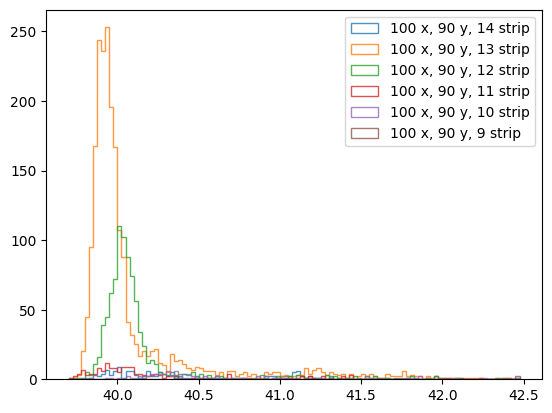

In [100]:
vec_plot_hist(tr0_data, [100], [90], [14,13,12,11,10,9])
plt.legend()
plt.show()

In [101]:
tts_vals_tr0 = {}
tts_vals_tr1 = {}

for x in xpos:
    tts_vals_tr0[x] = {}
    for y in tr0_ypos:
        tts_vals_tr0[x][y] = {}
        for strip in tr0_strips:
            th1 = root.TH1F("hist", "hist", 150, 38, 42.5)
            for value in np.asarray(tr0_data[x][y][strip]):
                th1.Fill(value)
            fit = root.TF1("fit", "gaus", 38.5, 41)
            # fit.SetParameter(1, 39.8)
            th1.Fit(fit, "RQ")
            tts = fit.GetParameter(2)
            tts_vals_tr0[x][y][strip] = tts
            del th1

for x in xpos:
    tts_vals_tr1[x] = {}
    for y in tr1_ypos:
        tts_vals_tr1[x][y] = {}
        for strip in tr1_strips:
            th1 = root.TH1F("hist", "hist", 150, 38, 42.5)
            for value in np.asarray(tr1_data[x][y][strip]):
                th1.Fill(value)
            fit = root.TF1("fit", "gaus", 38.5, 41)
            # fit.SetParameter(1, 39.8)
            th1.Fit(fit, "RQ")
            tts = fit.GetParameter(2)
            tts_vals_tr1[x][y][strip] = tts
            del th1

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
W

In [102]:
test = np.asarray(list(tts_vals_tr0[100][80].values()))
np.min(test[test>0])

0.06810430623489325

In [103]:
# There should also be some check here that the best_val has a reasonable number of events in the hist

tts_tr0 = []
for y in tr0_ypos:
    for x in xpos:
        vals = np.asarray(list(tts_vals_tr0[x][y].values()))
        best_val = np.min(vals[vals>0])
        # if best_val > 0.1:
        #     print("BAD", x, y)
        # if best_val == 0:
        #     print("ZERO", x, y)
        print(f"x {x}, y {y}, {best_val}")
        tts_tr0.append(best_val)

tts_tr1 = []
for y in tr1_ypos:
    for x in xpos:
        vals = np.asarray(list(tts_vals_tr1[x][y].values()))
        best_val = np.min(vals[vals>0])
        # if best_val > 0.1:
        #     print("BAD", x, y)
        # if best_val == 0:
        #     print("ZERO", x, y)
        print(f"x {x}, y {y}, {best_val}")
        tts_tr1.append(best_val)

x 30, y 60, 0.12440644436418483
x 40, y 60, 0.09100805482748536
x 50, y 60, 0.20722151260011126
x 60, y 60, 0.14669542797123436
x 70, y 60, 0.06668737021432647
x 80, y 60, 0.18695955092042674
x 90, y 60, 0.07651855854035874
x 100, y 60, 0.18125884949143614
x 110, y 60, 0.11516113164400706
x 120, y 60, 0.0977428105116
x 130, y 60, 0.06668737021986094
x 140, y 60, 0.11531259422770096
x 150, y 60, 0.24147370894208825
x 160, y 60, 0.11834829240896652
x 170, y 60, 0.13133754673966178
x 180, y 60, 0.2546102525674603
x 190, y 60, 0.35010869364059105
x 200, y 60, 0.22709841081454757
x 30, y 65, 0.16656939027742823
x 40, y 65, 0.11098455058566402
x 50, y 65, 0.12344673784950615
x 60, y 65, 0.11010727534476773
x 70, y 65, 0.14971689311659034
x 80, y 65, 0.1088332170139694
x 90, y 65, 0.2580308535988604
x 100, y 65, 0.08767337008970151
x 110, y 65, 0.01667184256255173
x 120, y 65, 0.07083228683150539
x 130, y 65, 0.09631475537154013
x 140, y 65, 0.0831137249741208
x 150, y 65, 0.13498425204194678

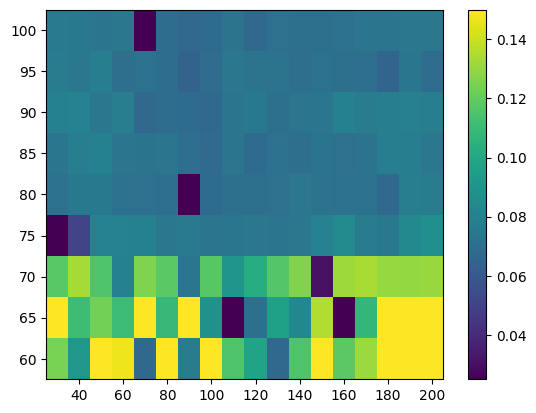

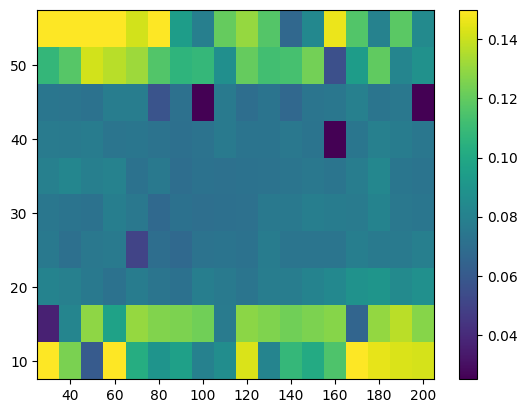

In [104]:
xx0, yy0 = np.meshgrid(xpos, tr0_ypos)
zz0 = np.asarray(tts_tr0).reshape(len(tr0_ypos), len(xpos))
plt.pcolormesh(xx0, yy0, zz0, vmin=0.025, vmax=0.15)
plt.colorbar()
plt.show()

xx1, yy1 = np.meshgrid(xpos, tr1_ypos)
zz1 = np.asarray(tts_tr1).reshape(len(tr1_ypos), len(xpos))
plt.pcolormesh(xx1, yy1, zz1, vmin=0.025, vmax=0.15)
plt.colorbar()
plt.show()

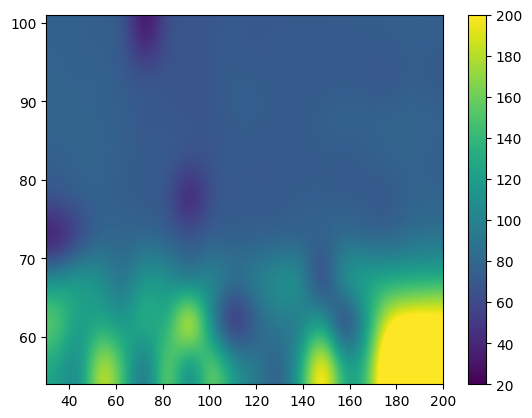

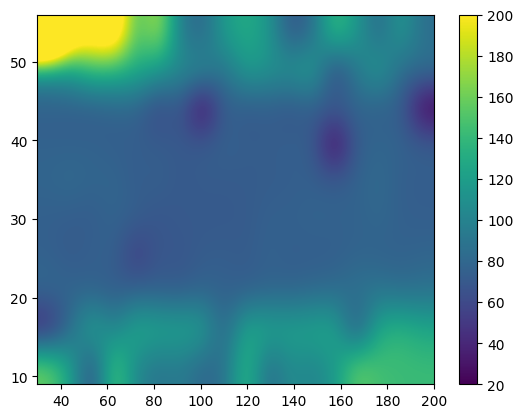

In [105]:
plt.imshow(zz0*1000, vmin=20, vmax=200, interpolation="bicubic", aspect="auto", origin="lower", extent=[30, 200, 54, 101])
plt.colorbar()
plt.show()

plt.imshow(zz1*1000, vmin=20, vmax=200, interpolation="bicubic", aspect="auto", origin="lower", extent=[30, 200, 9, 56])
plt.colorbar()
plt.show()

In [131]:
# We have overlap between the two datasets at y=55
# This is the first element of tr0_pos
# and the last element of tr1_pos
# Here we take the average of the two, remove the row from tr1 data and replace the tr0 row with the average
# This ensures there is still the correct number of rows

print(zz1[-1,:])
print(zz0[0,:])
zz0[0,:] = (zz0[0,:]+zz1[-1,:])/2.0
zz1 = np.delete(zz1, -1, axis=0)

[0.07408815 0.07353609 0.07210151 0.07729508 0.07749879 0.05726936
 0.07119048 0.01667184 0.07606207 0.06952975 0.07318891 0.06668737
 0.07373832 0.07474551 0.079183   0.07345972 0.07510852 0.01667184]
[0.12440644 0.09100805 0.20722151 0.14669543 0.06668737 0.18695955
 0.07651856 0.18125885 0.11516113 0.09774281 0.06668737 0.11531259
 0.24147371 0.11834829 0.13133755 0.25461025 0.35010869 0.22709841]


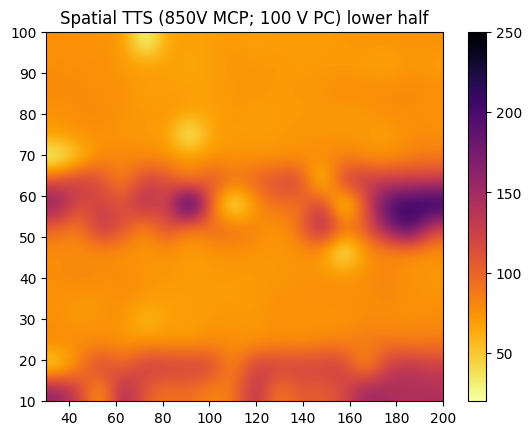

In [132]:
# xx, yy = np.meshgrid(xpos, tr1_ypos+tr0_ypos)
# zz0 = np.asarray(tts_tr0).reshape(len(tr0_ypos), len(xpos))
# zz1 = np.asarray(tts_tr1).reshape(len(tr1_ypos), len(xpos))
# zzz = np.vstack((zz1, zz0))


plt.imshow(np.vstack((zz1, zz0))*1000, vmin=20, vmax=250, interpolation="bicubic", aspect="auto", origin="lower", extent=[30, 200, 10, 100], cmap="inferno_r")
plt.title("Spatial TTS (850V MCP; 100 V PC) lower half")
plt.colorbar()
plt.show()

{14: 0.17561367623730478, 13: 0.07696441184601371, 12: 0.08103459416486812, 11: 0.10502604249936406, 10: 0.25989380814350727, 9: 3.1482938104546005, 8: 3.2728749476334715, 7: 5.687916919278983}
{14: 0.21417565578592462, 13: 0.0790707252294359, 12: 0.07867788591610025, 11: 0.13499306372110417, 10: 0.23857916787596575, 9: 0.24145817285023574, 8: 7.642374818895187, 7: 8.575541630554385}
0.09100805482748536
Plotting 170 X, 90 Y and 13 strip
Plotting 180 X, 90 Y and 13 strip


2195

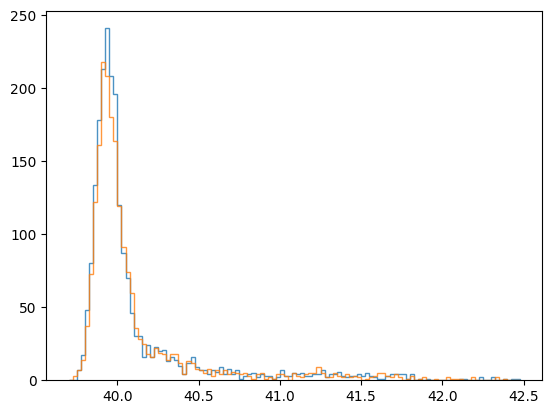

In [107]:
print(tts_vals_tr0[170][90])
print(tts_vals_tr0[180][90])
print(tts_tr0[1])
vec_plot_hist(tr0_data, [170, 180], [90], [13])
len(tr0_data[150][95][13])